**Problem Statement**:  
To build a predictive model that determines the likelihood of an individual in East Africa having a bank account based on demographic, economic, and social factors.

**Data Set Description**:  
This dataset, focusing on financial inclusion in East Africa, includes information on individuals’ age, household size, marital status, education level, job type, income status, location type (urban or rural), and cellphone access. The goal is to identify the factors influencing access to financial services.

**Key Predictor Variables**:
- **Location Type**: Urban or Rural
- **Cellphone Access**: Yes or No
- **Household Size**: Number of individuals in the household
- **Age of Respondent**: Age in years
- **Marital Status**: Married or Single
- **Has Income**: Yes or No
- **Job Type**: Various employment types, such as Farming, Government, Private, Informally employed, etc.
- **Education Level**: Categories include Primary, No Formal Education, Secondary, Tertiary, and Other.

**Target Variable**:  
- **Bank Account**: Indicates if the individual has a bank account (Yes or No).

This project aims to identify patterns and predict financial inclusion, helping policymakers and organizations promote economic empowerment in underserved regions.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Financial_inclusion_dataset.csv")

In [3]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
df.shape

(23524, 13)

In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23524,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524.0,NaN,NaN,NaN,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
uniqueid,23524,8735,uniqueid_1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_account,23524,2,No,20212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_type,23524,2,Rural,14343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellphone_access,23524,2,Yes,17454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23524.0,NaN,NaN,NaN,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,NaN,NaN,NaN,38.80522,16.520569,16.0,26.0,35.0,49.0,100.0
gender_of_respondent,23524,2,Female,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship_with_head,23524,6,Head of Household,12831,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['location_type'].value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

In [9]:
# Binary Encode with Binary Varibles
df['bank_account'] = df['bank_account'].map({'Yes': 1, 'No': 0})
df['cellphone_access'] = df['cellphone_access'].map({'Yes': 1, 'No': 0})
df['gender_of_respondent'] = df['gender_of_respondent'].map({'Female': 0, 'Male': 1})
df['location_type'] = df['location_type'].map({'Rural': 0, 'Urban': 1})

In [10]:
df['relationship_with_head'].value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

In [11]:
df['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [12]:
df['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [13]:
df['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [14]:
df = pd.get_dummies(df, columns=['job_type'], drop_first=True)

In [15]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type_Farming and Fishing',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed'],
      dtype='object')

In [16]:
df['has_income'] = df[['job_type_Farming and Fishing', 'job_type_Formally employed Government', 'job_type_Formally employed Private', 
                       'job_type_Informally employed', 'job_type_Other Income', 'job_type_Self employed'  ]].sum(axis=1)

In [17]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,has_income
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,...,False,False,False,False,False,False,False,False,True,1
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,...,False,False,False,True,False,False,False,False,False,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,...,False,False,False,False,False,False,False,False,True,1
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,...,False,False,True,False,False,False,False,False,False,1
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,...,False,False,False,False,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,0,Head of Household,...,False,False,False,False,False,False,True,False,False,1
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,0,Head of Household,...,False,False,False,False,False,False,True,False,False,1
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,0,Parent,...,False,False,False,False,False,False,True,False,False,1
23522,Uganda,2018,uniqueid_2116,0,1,1,7,30,0,Parent,...,False,False,False,False,False,False,False,False,True,1


In [18]:
# Creating binary columns for each marital status
df['is_married'] = df['marital_status'].apply(lambda x: 1 if x == 'Married/Living together' else 0)
df['is_single'] = df['marital_status'].apply(lambda x: 1 if x == 'Single/Never Married' else 0)

In [19]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,has_income,is_married,is_single
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,...,False,False,False,False,False,False,True,1,1,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,...,False,True,False,False,False,False,False,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,...,False,False,False,False,False,False,True,1,0,1
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,...,True,False,False,False,False,False,False,1,1,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,...,False,False,True,False,False,False,False,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,0,Head of Household,...,False,False,False,False,True,False,False,1,0,0
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,0,Head of Household,...,False,False,False,False,True,False,False,1,0,1
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,0,Parent,...,False,False,False,False,True,False,False,1,0,0
23522,Uganda,2018,uniqueid_2116,0,1,1,7,30,0,Parent,...,False,False,False,False,False,False,True,1,0,0


In [20]:
# Creating binary columns for each education level
df['primary_education'] = df['education_level'].apply(lambda x: 1 if x == 'Primary education' else 0)
df['no_education'] = df['education_level'].apply(lambda x: 1 if x == 'No formal education' else 0)
df['secondary_education'] = df['education_level'].apply(lambda x: 1 if x == 'Secondary education' else 0)
df['tertiary_education'] = df['education_level'].apply(lambda x: 1 if x == 'Tertiary education' else 0)
df['vocational_training'] = df['education_level'].apply(lambda x: 1 if x == 'Vocational/Specialised training' else 0)
df['other_education'] = df['education_level'].apply(lambda x: 1 if x == 'Other/Dont know/RTA' else 0)

In [21]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,job_type_Self employed,has_income,is_married,is_single,primary_education,no_education,secondary_education,tertiary_education,vocational_training,other_education
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,...,True,1,1,0,0,0,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,...,False,0,0,0,0,1,0,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,...,True,1,0,1,0,0,0,0,1,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,...,False,1,1,0,1,0,0,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,...,False,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,0,Head of Household,...,False,1,0,0,0,1,0,0,0,0
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,0,Head of Household,...,False,1,0,1,0,0,1,0,0,0
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,0,Parent,...,False,1,0,0,1,0,0,0,0,0
23522,Uganda,2018,uniqueid_2116,0,1,1,7,30,0,Parent,...,True,1,0,0,0,0,1,0,0,0


In [22]:
# Selecting only numeric columns for correlation to check for linear relationship
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

In [23]:
correlation_matrix

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,has_income,is_married,is_single,primary_education,no_education,secondary_education,tertiary_education,vocational_training,other_education
year,1.000000,0.112318,0.214621,-0.066505,-0.052264,-0.019330,0.000317,-0.119848,-0.005174,0.022470,-0.080300,-0.095970,0.118902,0.040560,0.129668,-0.004110
bank_account,0.112318,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,0.061478,0.086518,-0.040771,-0.173702,-0.142661,0.123702,0.241958,0.232187,0.019255
location_type,0.214621,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,-0.062116,-0.236190,0.268959,-0.017513,-0.090530,0.043332,0.084803,0.050682,0.005291
cellphone_access,-0.066505,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,0.135227,0.158290,-0.065682,-0.009652,-0.204751,0.120163,0.099981,0.099093,-0.007483
household_size,-0.052264,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.004957,0.314821,-0.161510,-0.017150,-0.016943,0.096128,-0.079218,-0.025579,0.002519
age_of_respondent,-0.019330,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,0.028860,0.053767,-0.296633,-0.071953,0.360651,-0.210338,-0.091143,-0.037137,0.025557
gender_of_respondent,0.000317,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,0.146319,0.056201,0.086199,0.019350,-0.114902,0.057692,0.041775,0.025083,-0.003034
has_income,-0.119848,0.061478,-0.062116,0.135227,0.004957,0.028860,0.146319,1.000000,0.153847,-0.094831,0.114937,-0.024810,-0.108540,-0.031677,0.006161,-0.002324
is_married,-0.005174,0.086518,-0.236190,0.158290,0.314821,0.053767,0.056201,0.153847,1.000000,-0.657426,0.038260,-0.008467,0.005193,-0.092213,0.009907,0.011086
is_single,0.022470,-0.040771,0.268959,-0.065682,-0.161510,-0.296633,0.086199,-0.094831,-0.657426,1.000000,0.028174,-0.159623,0.077408,0.079033,0.014090,-0.013690


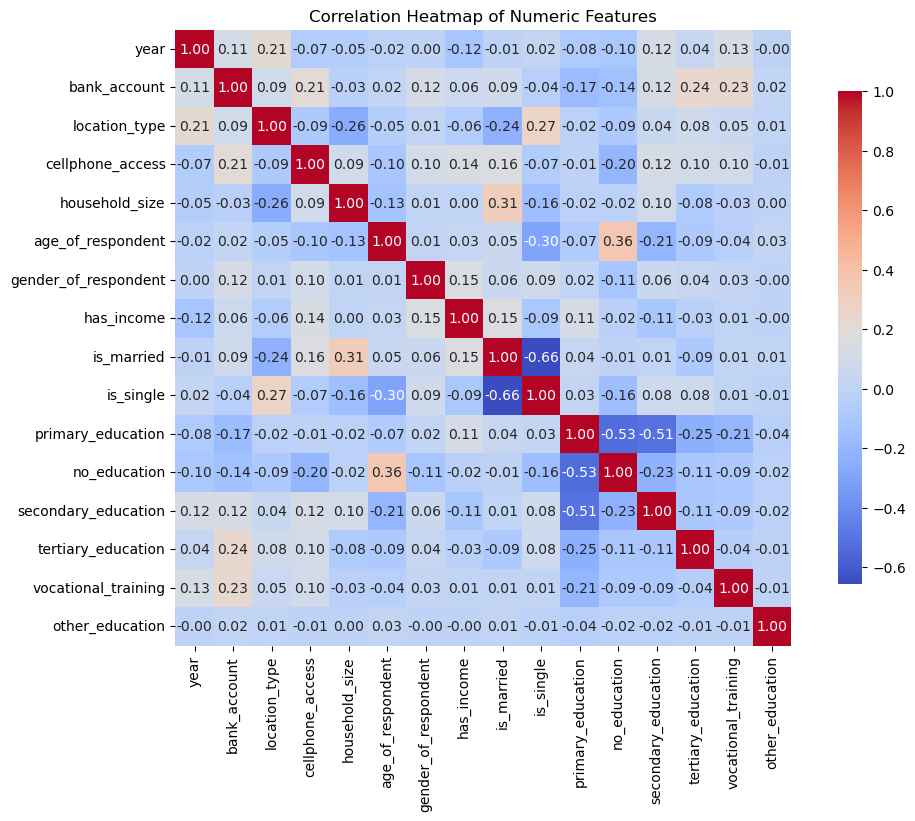

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [25]:
from sklearn.feature_selection import VarianceThreshold

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['country', 'uniqueid', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'bank_account'])
y = df['bank_account']

# Create the VarianceThreshold object with a specified threshold
selector = VarianceThreshold(threshold=0.1)

# Fit the model on the feature data
X_var_thresh = selector.fit_transform(X)

# Check which features remain
remaining_features = X.columns[selector.get_support()]
print(remaining_features)


Index(['year', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'job_type_Farming and Fishing',
       'job_type_Informally employed', 'job_type_Self employed', 'has_income',
       'is_married', 'is_single', 'primary_education', 'no_education',
       'secondary_education'],
      dtype='object')


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
X = df.drop(columns=['year', 'country', 'uniqueid', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 
                    'education_level', 'vocational_training', 'bank_account', 'job_type_Remittance Dependent',])

y = df['bank_account']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [29]:
model= LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear')
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [30]:
y_pred = model.predict(X_test)

In [31]:
accS = accuracy_score(y_pred, y_test)
accS

0.8852284803400637

In [32]:
conf_mat = confusion_matrix(y_pred, y_test)
conf_mat

array([[3978,  455],
       [  85,  187]], dtype=int64)

In [33]:
class_report = classification_report(y_pred, y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4433
           1       0.29      0.69      0.41       272

    accuracy                           0.89      4705
   macro avg       0.64      0.79      0.67      4705
weighted avg       0.94      0.89      0.91      4705



In [34]:
model.coef_

array([[ 0.37867042,  1.96007373, -0.03271991,  0.02469186, -0.03128304,
         1.89062216,  1.40243661,  1.34441854, -0.3498627 , -1.37681557,
         0.27770818,  0.0475768 ,  0.36194722,  0.55145016, -0.03142883,
        -1.97492074, -2.79879604, -0.87111555,  0.18595785, -0.1552701 ]])

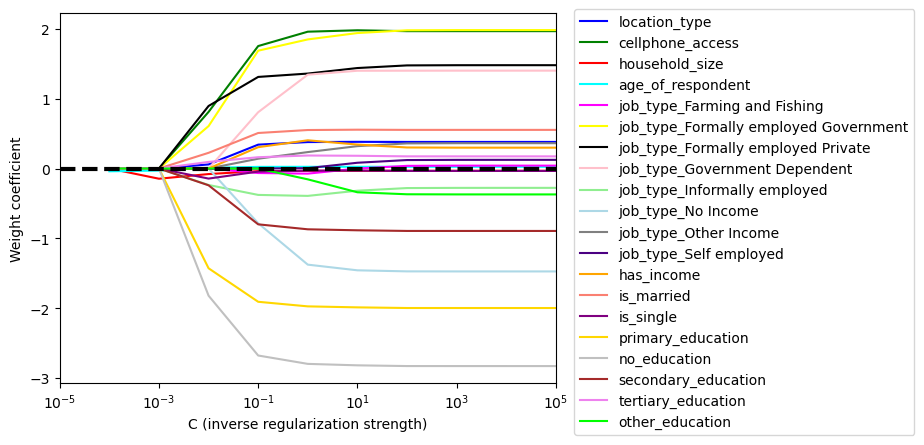

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the figure and axis
fig = plt.figure()
ax = plt.subplot(111)

# 28 color definitions
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 
          'black', 'pink', 'lightgreen', 'lightblue', 'gray', 
          'indigo', 'orange', 'salmon', 'purple', 'gold', 
          'silver', 'brown', 'violet', 'lime', 'teal', 
          'navy', 'maroon', 'olive', 'coral', 'chocolate', 
          'crimson', 'darkblue']

weights, params = [], []

# Loop through regularization strengths
for c in np.arange(-4., 6.):
    model2 = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', random_state=42)
    model2.fit(X_train, y_train)
    weights.append(model2.coef_)
    params.append(10**c)

weights = np.array(weights)

# Plot each column's weights using the color list
for column, color in zip(range(weights.shape[2]), colors):  # Use shape[2] for correct column size
    plt.plot(params, weights[:, 0, column],  # Access weights by [:, 0, column] for 2D plot
             label=X.columns[column],  # Ensure X.columns has the right size
             color=color)

# Add horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')

# Set the position of the legend
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

# Save the figure
plt.savefig('lasso-path.pdf', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()

In [36]:
import joblib

In [37]:
joblib.dump(model, 'financialmodel.pkl')

['financialmodel.pkl']

In [38]:
# Create the file Financial_Inclusion_Prediction_Streamlit_App.py in write mode
with open("Financial_Inclusion_Prediction_Streamlit_App.py", "w") as file:
    # Writing the Streamlit code into the file
    file.write("""

# Import necessary libraries
import streamlit as st
import pandas as pd
import joblib


# Title for the web app
st.title('Bank Account Prediction in East Africa')

# Load the trained model
model = joblib.load("financialmodel.pkl")  

# Input features from the user
st.header('Input Features')

location_type = st.selectbox('Location Type', ['Rural', 'Urban'])
cellphone_access = st.selectbox('Cellphone Access', ['Yes', 'No'])
household_size = st.number_input('Household Size', min_value=1, max_value=10, value=3)
age_of_respondent = st.number_input('Age of Respondent', min_value=18, max_value=100, value=30)
is_married = st.selectbox('Marital Status', ['Married', 'Single'])
has_income = st.selectbox('Has Income?', ['Yes', 'No'])

# Job type selection
job_types = [
    'Farming and Fishing',
    'Formally employed Government',
    'Formally employed Private',
    'Government Dependent',
    'Informally employed',
    'No Income',
    'Other Income',
    'Self employed'
]

# Select job type
selected_job_type = st.selectbox('Job Type', job_types)

# Education level features (since it's already binary-encoded)
primary_education = st.checkbox('Primary Education')
no_education = st.checkbox('No Formal Education')
secondary_education = st.checkbox('Secondary Education')
tertiary_education = st.checkbox('Tertiary Education')
other_education = st.checkbox('Other Education')

# Create a dictionary for the model input
input_data = {
    'location_type': [1 if location_type == 'Urban' else 0],
    'cellphone_access': [1 if cellphone_access == 'Yes' else 0],
    'household_size': [household_size],
    'age_of_respondent': [age_of_respondent],
    'job_type_Farming and Fishing': [1 if selected_job_type == 'Farming and Fishing' else 0],
    'job_type_Formally employed Government': [1 if selected_job_type == 'Formally employed Government' else 0],
    'job_type_Formally employed Private': [1 if selected_job_type == 'Formally employed Private' else 0],
    'job_type_Government Dependent': [1 if selected_job_type == 'Government Dependent' else 0],
    'job_type_Informally employed': [1 if selected_job_type == 'Informally employed' else 0],
    'job_type_No Income': [1 if selected_job_type == 'No Income' else 0],
    'job_type_Other Income': [1 if selected_job_type == 'Other Income' else 0],
    'job_type_Self employed': [1 if selected_job_type == 'Self employed' else 0],
    'has_income': [1 if has_income == 'Yes' else 0],
    'is_married': [1 if is_married == 'Married' else 0],
    'is_single': [1 if is_married == 'Single' else 0],  # Adjusted for logical consistency
    'primary_education': [1 if primary_education else 0],
    'no_education': [1 if no_education else 0],
    'secondary_education': [1 if secondary_education else 0],
    'tertiary_education': [1 if tertiary_education else 0],
    'other_education': [1 if other_education else 0]
}

# Convert input data to dataframe
input_df = pd.DataFrame(input_data)

# Display the input data
st.subheader('Input Data')
st.write(input_df)

# Prediction
if st.button('Predict'):
    prediction = model.predict(input_df)
    prediction_prob = model.predict_proba(input_df)
    
    if prediction[0] == 1:
        st.success(f"The model predicts that this individual has a bank account with {prediction_prob[0][1] * 100:.2f}% probability.")
    else:
        st.error(f"The model predicts that this individual does NOT have a bank account with {prediction_prob[0][0] * 100:.2f}% probability.")

""")